## Aligning Simulated Datasets (from MMD-MA)

We first demonstrate the functionality and performance of SCOT aligner on three simulated datasets borrowed from [the paper of the MMD-MA aligner](https://drops.dagstuhl.de/opus/volltexte/2019/11040/pdf/LIPIcs-WABI-2019-10.pdf). <br>

In these simulations, there are three datasets with two domains in each:<br>
-**The first dataset** forms a branching structure, simulating what one might observe in a cell differentiation scenario. <br>
-**The second dataset** is a non-linear projection of the first one, demonstrating SCOT's capability of aligning non-linear datasets.<br>
-**The third dataset** is another non-linear projection of the first dataset, but this time forming a circular frustum, simulating what one might observe when there are cells from different stages of the cell cycle in a dataset.<br>

If you are interested in seeing alignments on: <br> 
**(a)** [larger simulated RNA-seq datasets](https://rsinghlab.github.io/SCOT/simu_synrna/),
**(b)** [real datasets with continuous trajectories](https://rsinghlab.github.io/SCOT/examples_scgem/), 
**(c)** [discrete clusters](https://rsinghlab.github.io/SCOT/examples_snare/), 
**(d)** [unbalanced clusters](https://rsinghlab.github.io/SCOT/examples_sciomics/), 
**(e)** [unbalanced clusters](https://rsinghlab.github.io/SCOT/examples_unbalanced/)<br>
and so on, please follow the links or visit the other examples on [our documentation website](https://rsinghlab.github.io/SCOT).<br>

If you would like to run these notebooks on your computer, please check out the notebooks in [the /examples folder on our GitHub repository](https://github.com/rsinghlab/SCOT/tree/master/examples).

### Reading in and Visualizing the Original Datasets (Before Alignment):

In [1]:
################## READING IN THE THREE DATASETS #########################
import numpy as np #For reading in files

# The first simulated dataset: Branching Tree, simulating cell differentiation
X1=np.genfromtxt("../data/s1_mapped1.txt", delimiter="\t")
y1=np.genfromtxt("../data/s1_mapped2.txt", delimiter="\t")
print("Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the first dataset:\n", X1.shape, y1.shape)

# The second simulated dataset: Swiss roll, a non-linear projection of the first dataset
X2=np.genfromtxt("../data/s2_mapped1.txt", delimiter="\t")
y2=np.genfromtxt("../data/s2_mapped2.txt", delimiter="\t")
print("Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the second dataset:\n", X2.shape, y2.shape)

# The third simulated dataset: Circular frustum, simulating cell cycle
X3=np.genfromtxt("../data/s3_mapped1.txt", delimiter="\t")
y3=np.genfromtxt("../data/s3_mapped2.txt", delimiter="\t")

# Sanity check: printing out dimensionality of data we just loaded:
print("Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the third dataset:\n", X3.shape, y3.shape)

Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the first dataset:
 (300, 2000) (300, 1000)
Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the second dataset:
 (300, 2000) (300, 1000)
Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the third dataset:
 (300, 2000) (300, 1000)


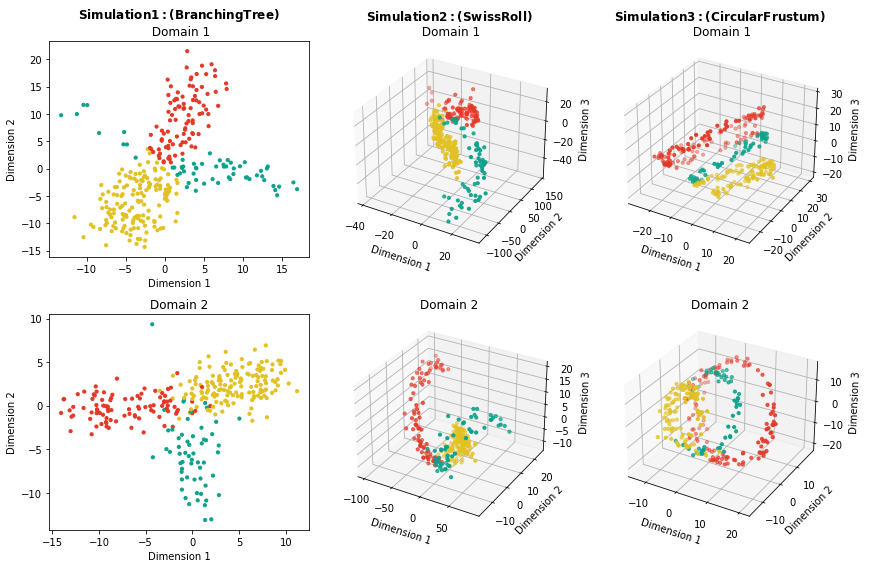

In [2]:
################## VISUALIZING THE ORIGINAL DATASETS ########################
import matplotlib.pyplot as plt # Imported for plotting
from sklearn.manifold import MDS # Imported for dimensionality reduction to 2D and 3D manifolds

################## Performing dimension reduction with PCA *solely* for visualization purposes: ##################
mds2D=MDS(n_components=2) #initializing multidimensional scaling (MDS) for manifold reduction to 2 dimensions 
mds3D=MDS(n_components=3) #initializing multidimensional scaling (MDS) for manifold reduction to 3 dimensions

X1mds= mds2D.fit_transform(X1); y1mds=mds2D.fit_transform(y1) #Reducing the first dataset to 2D (branching tree)
X2mds= mds3D.fit_transform(X2); y2mds=mds3D.fit_transform(y2) #Reducing the second dataset to 3D (Swiss roll)
X3mds= mds3D.fit_transform(X3); y3mds=mds3D.fit_transform(y3) #Reducing the third dataset to 3D (Circular frustum)

################## Reading in cell type label information for visualization: ##################
X1lab=np.genfromtxt("../data/s1_type1.txt", delimiter="\t"); y1lab=np.genfromtxt("../data/s1_type2.txt", delimiter="\t")
X2lab=np.genfromtxt("../data/s2_type1.txt", delimiter="\t"); y2lab=np.genfromtxt("../data/s2_type2.txt", delimiter="\t")
X3lab=np.genfromtxt("../data/s3_type1.txt", delimiter="\t"); y3lab=np.genfromtxt("../data/s3_type2.txt", delimiter="\t")

################## Plotting the original datasets in a 2 by 3 figure: ##################
# Defining a nice color palette
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = ["#e43827","#0ba28b","#e2c122"]
clrmap = ListedColormap(colors)

#Plotting Simulation 1:
fig=plt.figure(figsize=(12, 8), tight_layout=True)
ax1=fig.add_subplot(2,3,1)
ax1.scatter(X1mds[:,0], X1mds[:,1], s=10, c=X1lab, cmap=clrmap)
ax1.set_title(r"$\bf{Simulation 1: (Branching Tree)}$" + "\n Domain 1")
ax1.set_xlabel("Dimension 1"); ax1.set_ylabel("Dimension 2")
ay1=fig.add_subplot(2,3,4)
ay1.scatter(y1mds[:,0], y1mds[:,1], s=10, c=y1lab, cmap=clrmap)
ay1.set_title("Domain 2")
ay1.set_xlabel("Dimension 1"); ay1.set_ylabel("Dimension 2")

#Plotting Simulation 2:
ax2=fig.add_subplot(2,3,2, projection='3d')
ax2.scatter(X2mds[:,0], X2mds[:,1], X2mds[:,2], s=10, c=X2lab, cmap=clrmap)
ax2.set_title(r"$\bf{Simulation 2: (Swiss Roll)}$" + "\n Domain 1")
ax2.set_xlabel("Dimension 1"); ax2.set_ylabel("Dimension 2"); ax2.set_zlabel("Dimension 3")
ay2=fig.add_subplot(2,3,5, projection='3d')
ay2.scatter(y2mds[:,0], y2mds[:,1], y2mds[:,2], s=10, c=y2lab, cmap=clrmap)
ay2.set_title("Domain 2")
ay2.set_xlabel("Dimension 1"); ay2.set_ylabel("Dimension 2"); ay2.set_zlabel("Dimension 3")

#Plotting Simulation 3:
ax3=fig.add_subplot(2,3,3, projection='3d')
ax3.scatter(X3mds[:,0], X3mds[:,1], X3mds[:,2], s=10, c=X3lab, cmap=clrmap)
ax3.set_title(r"$\bf{Simulation 3: (Circular Frustum)}$" + "\n Domain 1")
ax3.set_xlabel("Dimension 1"); ax3.set_ylabel("Dimension 2"); ax3.set_zlabel("Dimension 3")
ay3=fig.add_subplot(2,3,6, projection='3d')
ay3.scatter(y3mds[:,0], y3mds[:,1], y3mds[:,2], s=10, c=y3lab, cmap=clrmap)
ay3.set_title("Domain 2")
ay3.set_xlabel("Dimension 1"); ay3.set_ylabel("Dimension 2"); ay3.set_zlabel("Dimension 3")
plt.title("Visualizing Datasets BEFORE Alignment")
plt.show()

### Aligning Datasets with SCOT

In [10]:
from scot2 import SCOT 

# Initialize SCOT with the datasets to be aligned:
sc1=SCOT(X1, y1) 
X1_aligned, y1_aligned = sc1.align(k=30, e=9e-4, verbose=False, normalize=True, norm="zscore") 
# We run align() method with parameters k and e specified. These parameters came from our paper. 
# There are other parameter combinations which yield the same or very similar alignment. Feel free to experiment.
# Setting verbose=False so it doesn't print loss while aligning. We use z-score normalization for these datasets 
# since MMD-MA uses this normalization and we wanted to benchmark against it in our paper. Feel free to change to "l2"

sc2=SCOT(X2, y2)
X2_aligned, y2_aligned = sc2.align(k=25, e=5e-4, verbose=False, normalize=True, norm="zscore") 

sc3=SCOT(X3, y3)
X2_aligned, y2_aligned = sc3.align(k=100, e=4e-3, verbose=False, normalize=True, norm="zscore") 

### Visualizing the Aligned Datasets

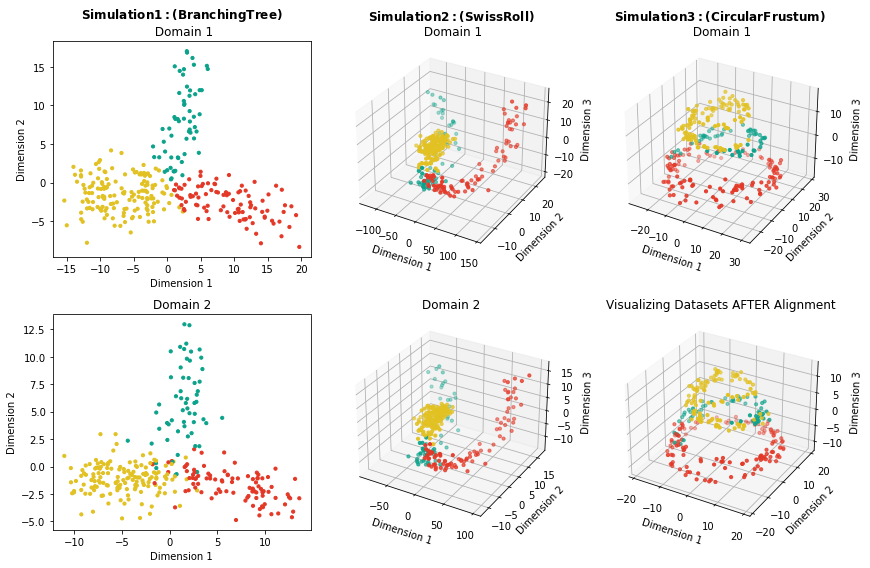

In [11]:
################## VISUALIZING THE ALIGNED DATASETS ########################

import matplotlib.pyplot as plt # Imported for plotting
from sklearn.manifold import MDS # Imported for dimensionality reduction to 2D and 3D manifolds
from sklearn.decomposition import PCA # Imported for dimensionality reduction to 2D and 3D manifolds

################## Performing dimension reduction with PCA *solely* for visualization purposes: ##################
pca2D=PCA(n_components=2) #initializing PCA reduction to 2D
pca3D=PCA(n_components=3) #initializing PCA reduction to 3D

X1mds= pca2D.fit_transform(X1); y1mds=pca2D.fit_transform(y1) #Reducing the first dataset to 2D (branching tree)
X2mds= pca3D.fit_transform(X2); y2mds=pca3D.fit_transform(y2) #Reducing the second dataset to 3D (Swiss roll)
X3mds= pca3D.fit_transform(X3); y3mds=pca3D.fit_transform(y3) #Reducing the third dataset to 3D (Circular frustum)

################## Plotting the original datasets in a 2 by 3 figure: ##################

#Plotting Simulation 1:
fig=plt.figure(figsize=(12, 8), tight_layout=True)
ax1=fig.add_subplot(2,3,1)
ax1.scatter(X1mds[:,0], X1mds[:,1], s=10, c=X1lab, cmap=clrmap)
ax1.set_title(r"$\bf{Simulation 1: (Branching Tree)}$" + "\n Domain 1")
ax1.set_xlabel("Dimension 1"); ax1.set_ylabel("Dimension 2")
ay1=fig.add_subplot(2,3,4)
ay1.scatter(y1mds[:,0], y1mds[:,1], s=10, c=y1lab, cmap=clrmap)
ay1.set_title("Domain 2")
ay1.set_xlabel("Dimension 1"); ay1.set_ylabel("Dimension 2")

#Plotting Simulation 2:
ax2=fig.add_subplot(2,3,2, projection='3d')
ax2.scatter(X2mds[:,0], X2mds[:,1], X2mds[:,2], s=10, c=X2lab, cmap=clrmap)
ax2.set_title(r"$\bf{Simulation 2: (Swiss Roll)}$" + "\n Domain 1")
ax2.set_xlabel("Dimension 1"); ax2.set_ylabel("Dimension 2"); ax2.set_zlabel("Dimension 3")
ay2=fig.add_subplot(2,3,5, projection='3d')
ay2.scatter(y2mds[:,0], y2mds[:,1], y2mds[:,2], s=10, c=y2lab, cmap=clrmap)
ay2.set_title("Domain 2")
ay2.set_xlabel("Dimension 1"); ay2.set_ylabel("Dimension 2"); ay2.set_zlabel("Dimension 3")

#Plotting Simulation 3:
ax3=fig.add_subplot(2,3,3, projection='3d')
ax3.scatter(X3mds[:,0], X3mds[:,1], X3mds[:,2], s=10, c=X3lab, cmap=clrmap)
ax3.set_title(r"$\bf{Simulation 3: (Circular Frustum)}$" + "\n Domain 1")
ax3.set_xlabel("Dimension 1"); ax3.set_ylabel("Dimension 2"); ax3.set_zlabel("Dimension 3")
ay3=fig.add_subplot(2,3,6, projection='3d')
ay3.scatter(y3mds[:,0], y3mds[:,1], y3mds[:,2], s=10, c=y3lab, cmap=clrmap)
ay3.set_title("Domain 2")
ay3.set_xlabel("Dimension 1"); ay3.set_ylabel("Dimension 2"); ay3.set_zlabel("Dimension 3")
plt.title("Visualizing Datasets AFTER Alignment")
plt.show()

### Evaluating Alignment Quality

In each of these simulated datasets, we have groundtruth information on 1--to--1 correspondences between the domains. This is because the two domains in each dataset were created via different projections of the same underlying embedding. Therefore, we will use this information to evaluate alignment quality.  